<a href="https://colab.research.google.com/github/Dihan07/Credit_Card_Fraud_Detection_XAI/blob/main/Copy_of_Credit_Card_Fraud_Detection_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

## Processing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
# df = pd.read_csv("/kaggle/input/creditdata/credit.csv")
df = pd.read_csv("/content/drive/MyDrive/Dataset/Dataset_Credit_Card_Fraud_Detection/dataset2.csv")

In [ ]:
df

,AcountNumber,CVV,CustomerAge,Gender,MaritalStatus,CardColour,CardType,Domain,Amount,AverageIncomeExpenditure,Outcome,CustomerCityAddress
0,1275734409,364,28.0,Male,Married,Gold,Verve,Local,129282,170919,0,Enugu
1,1271246193,401,25.0,Male,Single,Gold,Verve,International,574384,329353,1,Enugu
2,1242290165,266,21.0,Female,Married,White,Visa,International,190766,292922,0,Enugu
3,1245478185,402,26.0,Male,Unknown,White,Visa,Local,130395,145444,0,Ibadan
4,1258212072,334,28.0,Female,Married,Gold,Verve,International,685145,295990,1,Port Harcourt
...,...,...,...,...,...,...,...,...,...,...,...,...
37092,1250026389,637,62.0,Female,Married,Gold,Verve,Local,534813,198167,1,Lagos
37093,1247133695,582,20.0,Male,Divorced,Gold,Verve,Local,178903,147133,0,Enugu
37094,1260545996,571,67.0,Male,Married,White,Visa,International,301594,256814,1,Abuja
37095,1267917366,528,58.0,Female,Unknown,Gold,Verve,International,212826,113439,0,Port Harcourt


In [ ]:
df.describe()

,AcountNumber,CVV,CustomerAge,Amount,AverageIncomeExpenditure,Outcome
count,3.709700e+04,37097.000000,28246.000000,37097.000000,37097.000000,37097.000000
mean,1.264835e+09,443.595897,39.157509,550260.997736,227386.956492,0.737796
std,1.478694e+07,135.223267,20.063996,260629.814049,78977.053916,0.439839
min,1.239297e+09,211.000000,18.000000,100003.000000,100017.000000,0.000000
25%,1.251999e+09,327.000000,23.000000,324480.000000,161178.000000,0.000000
50%,1.264885e+09,443.000000,29.000000,550293.000000,222530.000000,1.000000
75%,1.277613e+09,561.000000,55.000000,775075.000000,283447.000000,1.000000
max,1.290470e+09,678.000000,85.000000,999956.000000,399971.000000,1.000000


In [ ]:
df.nunique()

,0
AcountNumber,37081
CVV,468
CustomerAge,68
Gender,2
MaritalStatus,4
CardColour,2
CardType,3
Domain,2
Amount,36386
AverageIncomeExpenditure,34681


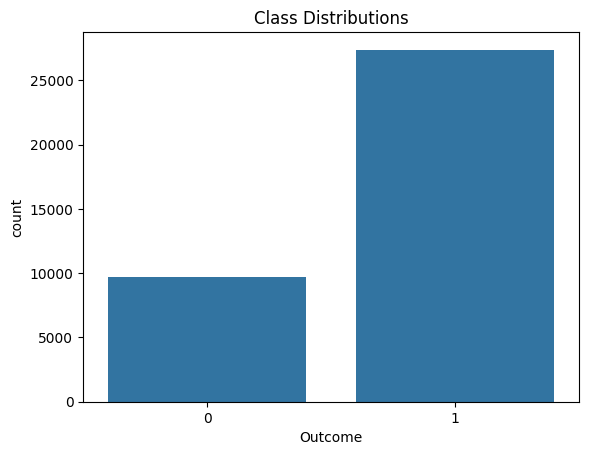

In [ ]:
sns.countplot(x = 'Outcome', data = df)
plt.title('Class Distributions');

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37097 entries, 0 to 37096
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AcountNumber              37097 non-null  int64  
 1   CVV                       37097 non-null  int64  
 2   CustomerAge               28246 non-null  float64
 3   Gender                    37097 non-null  object 
 4   MaritalStatus             37097 non-null  object 
 5   CardColour                37097 non-null  object 
 6   CardType                  37097 non-null  object 
 7   Domain                    37097 non-null  object 
 8   Amount                    37097 non-null  int64  
 9   AverageIncomeExpenditure  37097 non-null  int64  
 10  Outcome                   37097 non-null  int64  
 11  CustomerCityAddress       37097 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 3.4+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
AcountNumber,0
CVV,0
CustomerAge,8851
Gender,0
MaritalStatus,0
CardColour,0
CardType,0
Domain,0
Amount,0
AverageIncomeExpenditure,0


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
1,27370
0,9727


In [ ]:
# df = df.dropna()
df = df.fillna(df['CustomerAge'].mean())

In [ ]:
df.isnull().sum()

,0
AcountNumber,0
CVV,0
CustomerAge,0
Gender,0
MaritalStatus,0
CardColour,0
CardType,0
Domain,0
Amount,0
AverageIncomeExpenditure,0


Text(0.5, 1.0, 'Class Distributions')

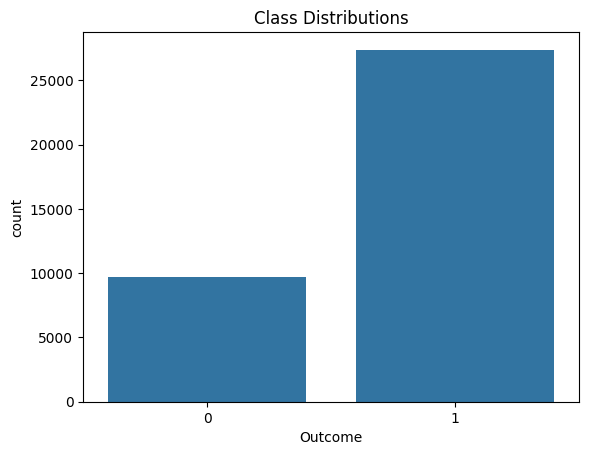

In [ ]:
sns.countplot(x = 'Outcome', data = df)
plt.title('Class Distributions')
# plt.grid()

In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
1,27370
0,9727


In [ ]:
categorical_columns = ['Gender', 'MaritalStatus', 'CardColour', 'CardType', 'Domain', 'CustomerCityAddress']

#  chi-square test for each categorical variable against the target 'Outcome'
for column in categorical_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(df[column], df['Outcome'])

    # chi-square test
    chi2, p, dof, ex = chi2_contingency(contingency_table)

    # Output results
    print(f"Chi-square test for {column}:")
    print(f"Chi2 Stat: {chi2}, p-value: {p}\n")


Chi-square test for Gender:
Chi2 Stat: 0.7271974778687842, p-value: 0.3937931060318126

Chi-square test for MaritalStatus:
Chi2 Stat: 6.803779596428727, p-value: 0.07842204291865204

Chi-square test for CardColour:
Chi2 Stat: 0.0014388350761103752, p-value: 0.9697419153587774

Chi-square test for CardType:
Chi2 Stat: 166.96567048206364, p-value: 5.54453744954651e-37

Chi-square test for Domain:
Chi2 Stat: 63.15175919780929, p-value: 1.9137850136431095e-15

Chi-square test for CustomerCityAddress:
Chi2 Stat: 10.766564642400883, p-value: 0.1491304477121523



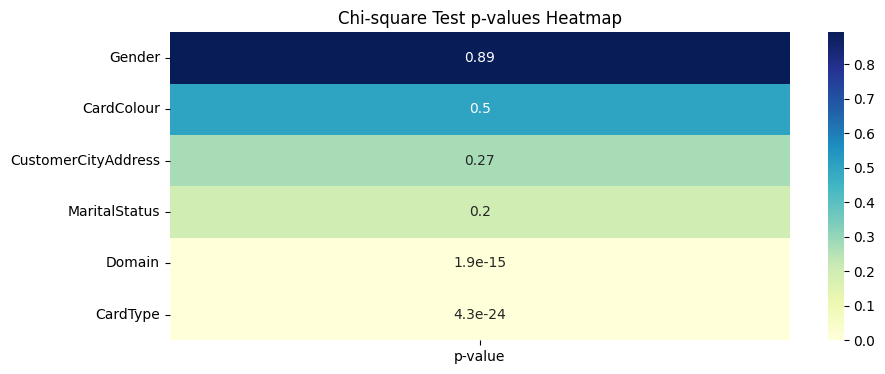

In [ ]:
# Provided chi-square data
chisquare_data = {
    'Gender': [0.892779715735525],
    'MaritalStatus': [0.19690710637881723],
    'CardColour': [0.5033411498197433],
    'CardType': [4.278585530396686e-24],
    'Domain': [1.9460105084715632e-15],
    'CustomerCityAddress': [0.2732515244588829]
}

# Create DataFrame
df_chisquare = pd.DataFrame(chisquare_data, index=['p-value']).T
df_chisquare = df_chisquare.sort_values(by=['p-value'], ascending=False)

# Create the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df_chisquare, annot=True, cmap='YlGnBu', cbar=True)
plt.title('Chi-square Test p-values Heatmap')
plt.show()


In [ ]:
numeric_columns = ['CustomerAge', 'Amount', 'AverageIncomeExpenditure','CVV']

# ANOVA for each numeric variable against 'Outcome'
for column in numeric_columns:
    # Perform ANOVA
    f_stat, p_value = stats.f_oneway(*(df[df['Outcome'] == outcome][column] for outcome in df['Outcome'].unique()))

    # Output the results
    print(f"ANOVA test for {column}:")
    print(f"F-statistic: {f_stat}, p-value: {p_value}\n")


ANOVA test for CustomerAge:
F-statistic: 0.29414665836917253, p-value: 0.5875786840061434

ANOVA test for Amount:
F-statistic: 23575.36441440479, p-value: 0.0

ANOVA test for AverageIncomeExpenditure:
F-statistic: 695.661551272569, p-value: 6.639915279053585e-152

ANOVA test for CVV:
F-statistic: 1.6371828856672916, p-value: 0.2007204287992542



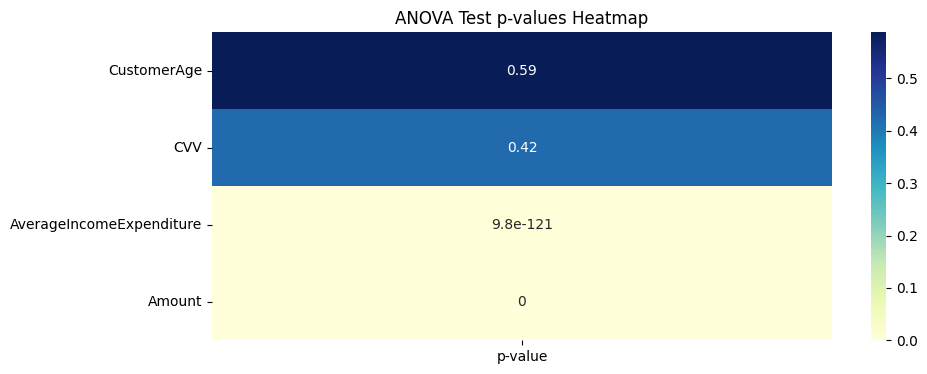

In [ ]:
# Data preparation
anova_data = {
    'CustomerAge': [0.5879999114514818],
    'Amount': [0.0],
    'AverageIncomeExpenditure': [9.813230683911233e-121],
    'CVV':[0.42442604496678726]
}

df_anova = pd.DataFrame(anova_data, index=['p-value']).T
df_anova = df_anova.sort_values(by=['p-value'], ascending=False)

# Create the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df_anova, annot=True, cmap='YlGnBu', cbar=True)
plt.title('ANOVA Test p-values Heatmap')
plt.show()


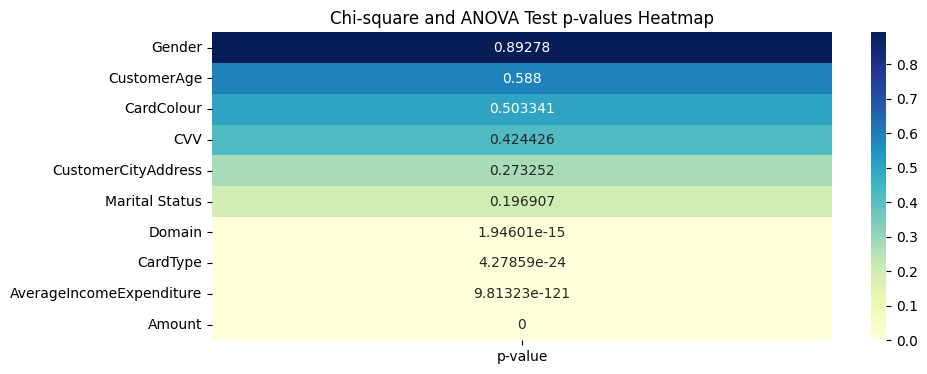

In [ ]:
# Provided chi-square data
combined_data_p = {
    'Gender': [0.892779715735525],
    'Marital Status': [0.19690710637881723],
    'CardColour': [0.5033411498197433],
    'CardType': [4.278585530396686e-24],
    'Domain': [1.9460105084715632e-15],
    'CustomerCityAddress': [0.2732515244588829],
    'CustomerAge': [0.5879999114514818],
    'Amount': [0.0],
    'AverageIncomeExpenditure': [9.813230683911233e-121],
    'CVV':[0.42442604496678726]
}

# Create DataFrame
df_combined_p = pd.DataFrame(combined_data_p, index=['p-value']).T
df_combined_p = df_combined_p.sort_values(by=['p-value'], ascending=False)

# Create the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df_combined_p, annot=True, fmt='g', cmap='YlGnBu', cbar=True)
plt.title('Chi-square and ANOVA Test p-values Heatmap')
plt.show()

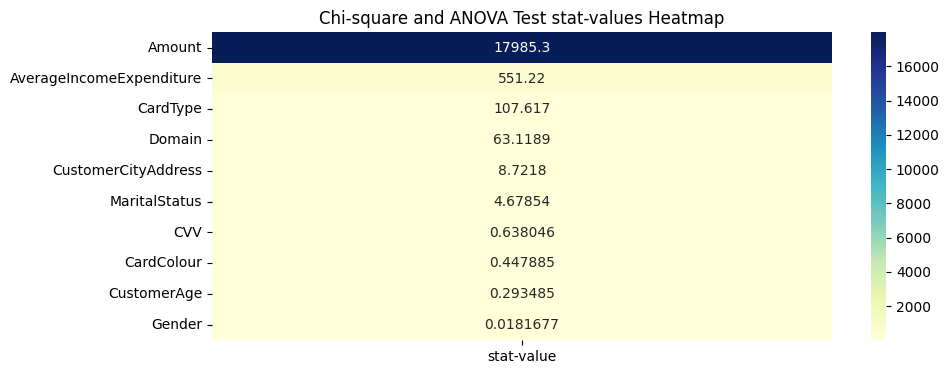

In [ ]:
# Provided chi-square data
combined_data_stat = {
    'Gender': [0.01816772929772209],
    'MaritalStatus': [4.678540665838402],
    'CardColour': [0.4478847885580666],
    'CardType': [107.61683952087458],
    'Domain': [63.11886799157868],
    'CustomerCityAddress': [8.721800323804638],
    'CustomerAge': [0.29348536006896264],
    'Amount': [17985.293588076787],
    'AverageIncomeExpenditure': [551.2200398201722],
    'CVV':[0.6380458002394802]
}

# Create DataFrame
df_combined_stat = pd.DataFrame(combined_data_stat, index=['stat-value']).T
df_combined_stat = df_combined_stat.sort_values(by=['stat-value'], ascending=False)

# Create the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df_combined_stat, annot=True, fmt='g', cmap='YlGnBu', cbar=True)
plt.title('Chi-square and ANOVA Test stat-values Heatmap')
plt.show()

In [ ]:
df.head()

,AcountNumber,CVV,CustomerAge,Gender,MaritalStatus,CardColour,CardType,Domain,Amount,AverageIncomeExpenditure,Outcome,CustomerCityAddress
0,1275734409,364,28.0,Male,Married,Gold,Verve,Local,129282,170919,0,Enugu
1,1271246193,401,25.0,Male,Single,Gold,Verve,International,574384,329353,1,Enugu
2,1242290165,266,21.0,Female,Married,White,Visa,International,190766,292922,0,Enugu
3,1245478185,402,26.0,Male,Unknown,White,Visa,Local,130395,145444,0,Ibadan
4,1258212072,334,28.0,Female,Married,Gold,Verve,International,685145,295990,1,Port Harcourt


In [ ]:
# df.drop(['Gender','Marital Status','CardColour','Customer_City_Address','CVV','CustomerAge'],axis=1, inplace = True)
df = df.drop(['AcountNumber', 'Gender', 'CardColour', 'CVV', 'CustomerAge'], axis=1)

In [ ]:
df.head()

,MaritalStatus,CardType,Domain,Amount,AverageIncomeExpenditure,Outcome,CustomerCityAddress
0,Married,Verve,Local,129282,170919,0,Enugu
1,Single,Verve,International,574384,329353,1,Enugu
2,Married,Visa,International,190766,292922,0,Enugu
3,Unknown,Visa,Local,130395,145444,0,Ibadan
4,Married,Verve,International,685145,295990,1,Port Harcourt


In [ ]:
# encoder = OneHotEncoder()

# # Apply OneHotEncoder and convert it to a DataFrame
# encoder_df = pd.DataFrame(encoder.fit_transform(df[['Domain']]).toarray(),
#                           columns=encoder.get_feature_names_out(['Domain']))

# # Reset the index on encoder_df to align it with the original df (if necessary)
# encoder_df.index = df.index

# # Join the new encoded DataFrame with the original DataFrame
# df = df.join(encoder_df)

# # Now the 'Domain' column should be preserved along with the one-hot encoded columns
# df.drop('Domain', axis=1, inplace=True)

In [ ]:
# encoder = OneHotEncoder()

# # Apply OneHotEncoder and convert it to a DataFrame
# encoder_df = pd.DataFrame(encoder.fit_transform(df[['CardType']]).toarray(),
#                           columns=encoder.get_feature_names_out(['CardType']))

# # Reset the index on encoder_df to align it with the original df (if necessary)
# encoder_df.index = df.index

# # Join the new encoded DataFrame with the original DataFrame
# df = df.join(encoder_df)

# # Now the 'Domain' column should be preserved along with the one-hot encoded columns
# df.drop('CardType', axis=1, inplace=True)

In [ ]:
df['MaritalStatus'] = df['MaritalStatus'].map({"Married": 0, "Single": 1, "Divorced": 2, "Unknown": 3})
df['CardType'] = df['CardType'].map({"Verve": 0, "Visa": 1, "MasterCard": 2})
df['Domain'] = df['Domain'].map({"Local": 0, "International": 1})
df['CustomerCityAddress'] = df['CustomerCityAddress'].map({"Lagos": 0, "Abuja": 1, "Ibadan": 2, "Enugu": 3, "Port Harcourt": 4, "Kano": 5, "Ota": 6, "Other": 7})

In [ ]:
df.head()

,MaritalStatus,CardType,Domain,Amount,AverageIncomeExpenditure,Outcome,CustomerCityAddress
0,0,0,0,129282,170919,0,3
1,1,0,1,574384,329353,1,3
2,0,1,1,190766,292922,0,3
3,3,1,0,130395,145444,0,2
4,0,0,1,685145,295990,1,4


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Outcome', axis=1), df['Outcome'],
    test_size=0.20, random_state=42)

In [ ]:
y_train.value_counts()

,count
Outcome,
1,21971
0,7706


In [ ]:
y_test.value_counts()

,count
Outcome,
1,5399
0,2021


In [ ]:
# scaler = MinMaxScaler()
# X_train_normalized = scaler.fit_transform(X_train)
# X_test_normalized = scaler.transform(X_test)
X_train_normalized = X_train
X_test_normalized = X_test

## Re-Sampling Dataset

In [ ]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

In [ ]:
# nearmiss = NearMiss(version=1)
# X_train_normalized, y_train = nearmiss.fit_resample(X_train_normalized, y_train)

In [ ]:
# smote = SMOTE()
# X_train_normalized, y_train = smote.fit_resample(X_train_normalized, y_train)

In [ ]:
near_miss = NearMiss(version=1, sampling_strategy=0.45)
smote = SMOTE()

pipeline = Pipeline([
    ('near_miss', near_miss),
    ('smote', smote)
])

X_train_normalized, y_train = pipeline.fit_resample(X_train_normalized, y_train)

In [ ]:
print("Class distribution after re-sampling:\n", y_train.value_counts())

Class distribution after re-sampling:
 Outcome
0    17124
1    17124
Name: count, dtype: int64


## Training Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
model_rf =  RandomForestClassifier()
model_rf.fit(X_train_normalized, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model_rf.predict(X_test_normalized)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.85      0.76      2021
           1       0.94      0.85      0.89      5399

    accuracy                           0.85      7420
   macro avg       0.81      0.85      0.83      7420
weighted avg       0.87      0.85      0.86      7420



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[1724  297]
 [ 805 4594]]


In [ ]:
# labels= ['Valid', 'Fraud']
# conf_matrix=confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 5))
# sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
# plt.title("Random Forest - Confusion Matrix")
# plt.ylabel('True Value')
# plt.xlabel('Predicted Value')
# plt.show()

In [ ]:
y_pred_prob2 = model_rf.predict_proba(X_test_normalized)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2, pos_label=1)

In [ ]:
roc_auc2 = roc_auc_score(y_test, y_pred_prob2)
roc_auc2

0.9393121621016005

In [ ]:
# plt.plot(fpr2, tpr2, label='ROC curve (area = %0.2f)' % roc_auc2)
# plt.plot([0, 1], [0, 1], 'k--', label='Random Forest')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc="lower right")
# plt.show()

In [ ]:
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train_normalized, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = model_gb.predict(X_test_normalized)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.97      0.79      2021
           1       0.99      0.82      0.90      5399

    accuracy                           0.86      7420
   macro avg       0.83      0.90      0.84      7420
weighted avg       0.90      0.86      0.87      7420



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[1967   54]
 [ 973 4426]]


In [ ]:
# labels= ['Valid', 'Fraud']
# conf_matrix=confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 5))
# sns.heatmap(conf_matrix, xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
# plt.title("Gradient Boosting - Confusion Matrix")
# plt.ylabel('True Value')
# plt.xlabel('Predicted Value')
# plt.show()

In [ ]:
y_pred_prob3 = model_gb.predict_proba(X_test_normalized)[:, 1]
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3, pos_label=1)

In [ ]:
roc_auc3 = roc_auc_score(y_test, y_pred_prob3)
roc_auc3

0.9452075214324422

In [ ]:
# plt.plot(fpr3, tpr3, label='ROC curve (area = %0.2f)' % roc_auc3)
# plt.plot([0, 1], [0, 1], 'k--', label='Gradient Boosting')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve')
# plt.legend(loc="lower right")
# plt.show()

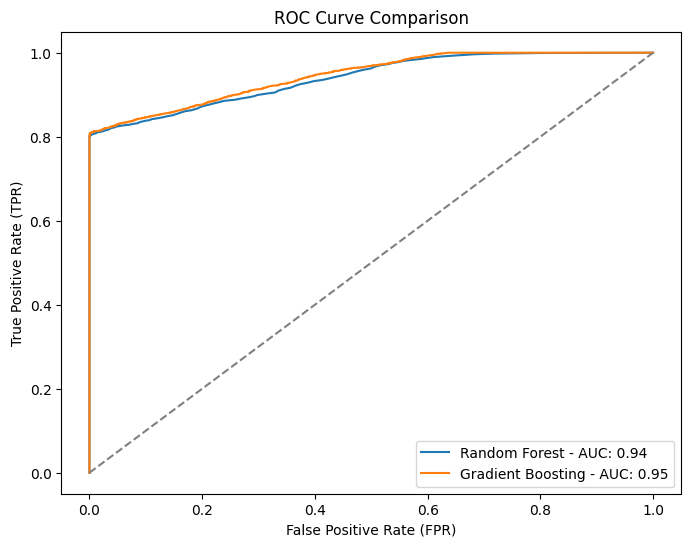

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, label='Random Forest - AUC: {:.2f}'.format(roc_auc2))
plt.plot(fpr3, tpr3, label='Gradient Boosting - AUC: {:.2f}'.format(roc_auc3))

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()

plt.show()

# XAI

In [ ]:
!pip install shap
import shap

In [ ]:
# explainer = shap.KernelExplainer(dtree.predict_proba, X_train.iloc[:450])
explainer = shap.KernelExplainer(model_rf.predict_proba, shap.sample(X_train, 450))

In [ ]:
n = 5000
shap_values = explainer.shap_values(X_test.iloc[:n])

  0%|          | 0/5000 [00:00<?, ?it/s]

In [ ]:
shap_values[0]

array([[-0.00902407,  0.00902407],
       [-0.00240852,  0.00240852],
       [-0.01004889,  0.01004889],
       [ 0.07281481, -0.07281481],
       [-0.2909563 ,  0.2909563 ],
       [-0.01582148,  0.01582148]])

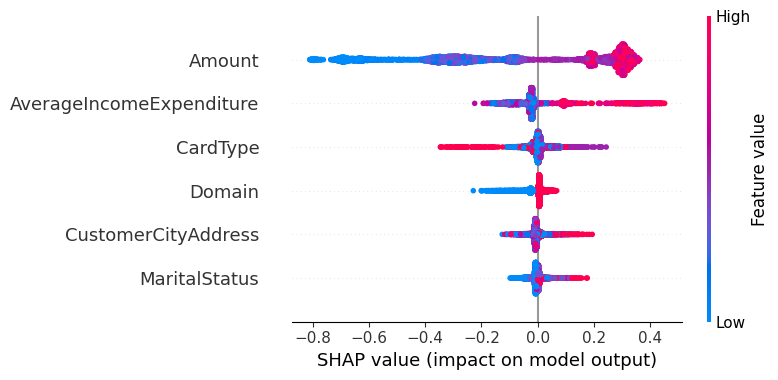

In [ ]:
shap.summary_plot(shap_values[:, :, 1], X_test.iloc[:n])

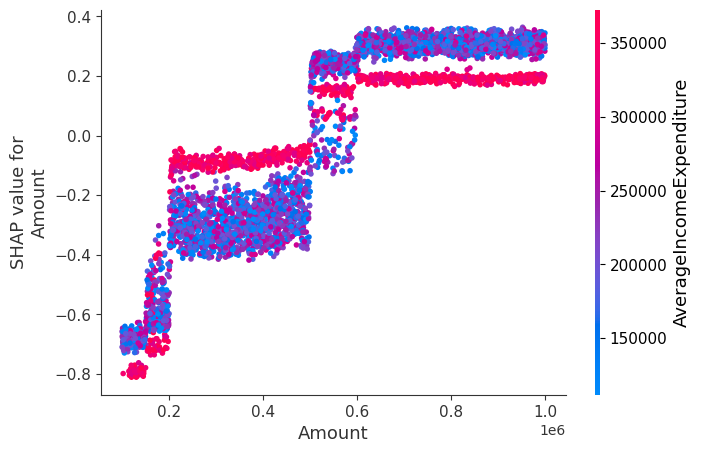

In [ ]:
shap.dependence_plot('Amount', shap_values[:, :, 1], X_test.iloc[:n], interaction_index="AverageIncomeExpenditure")

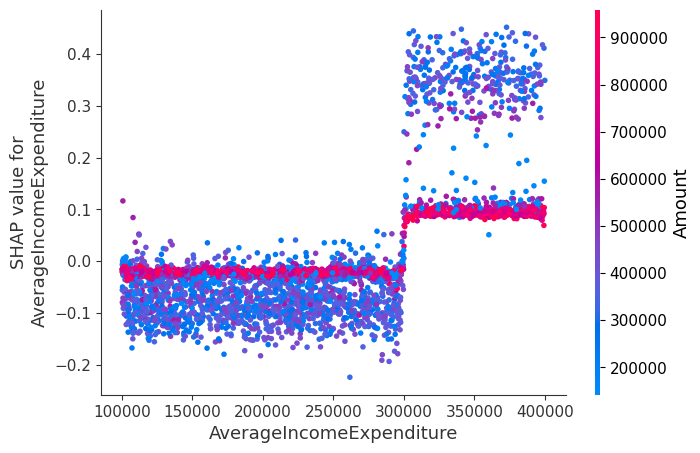

In [ ]:
shap.dependence_plot('AverageIncomeExpenditure', shap_values[:, :, 1], X_test.iloc[:n], interaction_index="Amount")

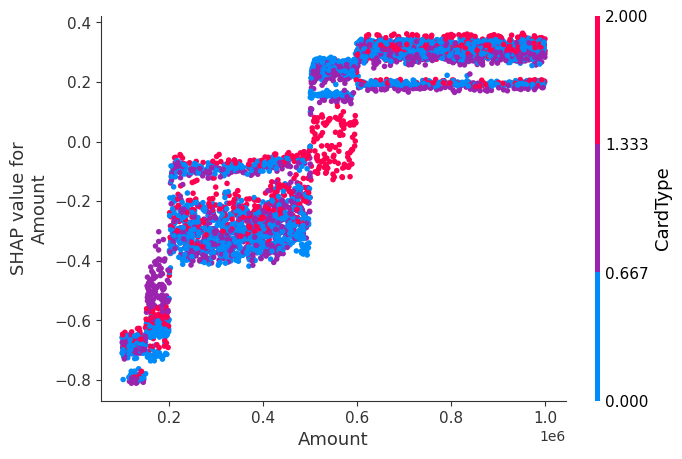

In [ ]:
shap.dependence_plot('Amount', shap_values[:, :, 1], X_test.iloc[:n], interaction_index="CardType")

In [ ]:
for i in range(50):
  if(y_test.iloc[i] == 0 and y_pred[i] == 0):
    print(i, end = " ")

2 5 7 8 10 13 21 22 25 46 

In [ ]:
for i in range(50):
  if(y_test.iloc[i] == 1 and y_pred[i] == 1):
    print(i, end = " ")

0 1 3 4 6 9 11 12 14 15 17 18 19 20 23 24 26 27 28 29 30 31 33 34 35 36 37 38 39 40 41 42 43 44 45 48 49 

In [ ]:
X_test[:50]

,MaritalStatus,CardType,Domain,Amount,AverageIncomeExpenditure,CustomerCityAddress
34378,1,0,1,227939,395897,7
31211,2,1,1,873267,364712,0
22101,1,0,1,394338,275678,7
18893,0,1,0,790916,146009,4
20417,2,0,1,708964,231201,1
1588,1,2,0,175399,228180,6
30571,0,1,1,993524,322602,0
7745,0,0,0,278467,107651,4
26372,1,0,1,149924,142593,6
3735,3,1,1,887078,279889,1


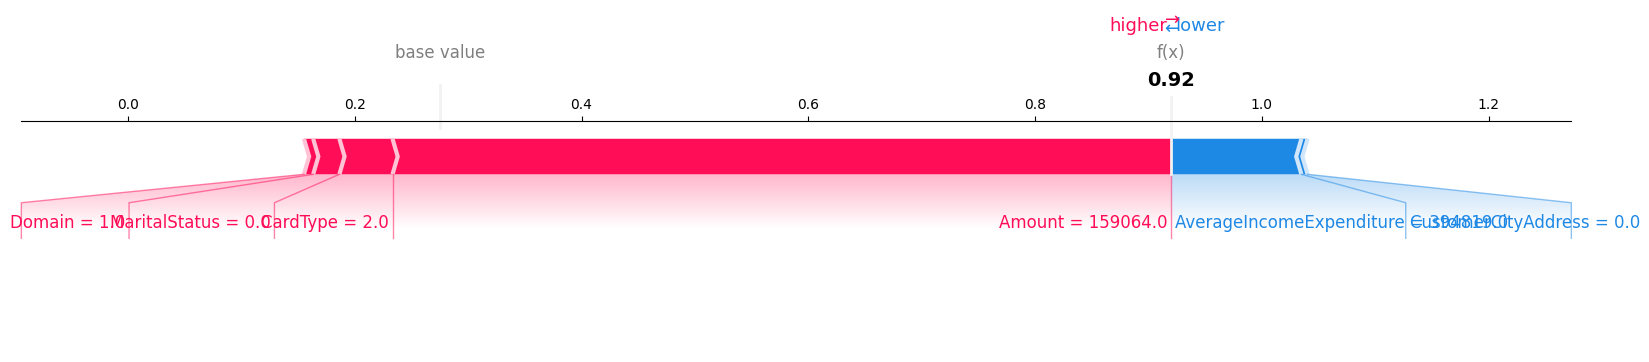

In [ ]:
i = 10
shap.force_plot(explainer.expected_value[0], shap_values[i][:, 0], X_test.iloc[i], matplotlib=True)

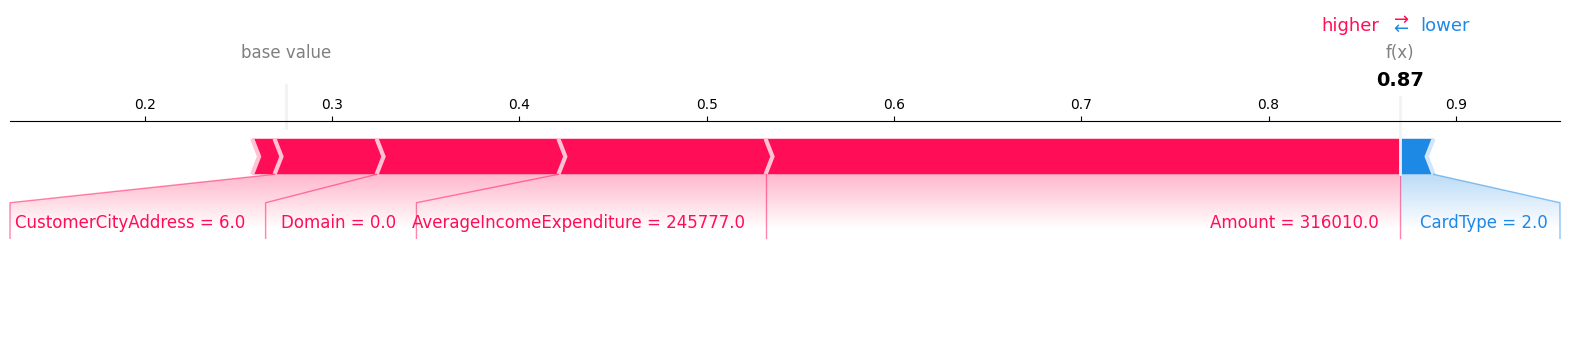

In [ ]:
i = 25
shap.force_plot(explainer.expected_value[0], shap_values[i][:, 0], X_test.iloc[i], matplotlib=True)

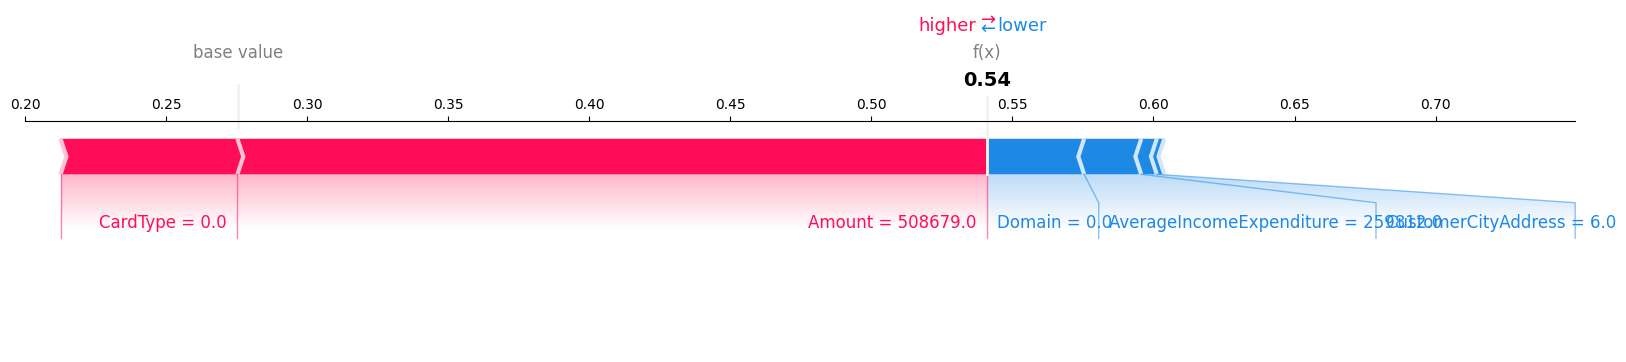

In [ ]:
i = 15
shap.force_plot(explainer.expected_value[0], shap_values[i][:, 1], X_test.iloc[i], matplotlib=True)

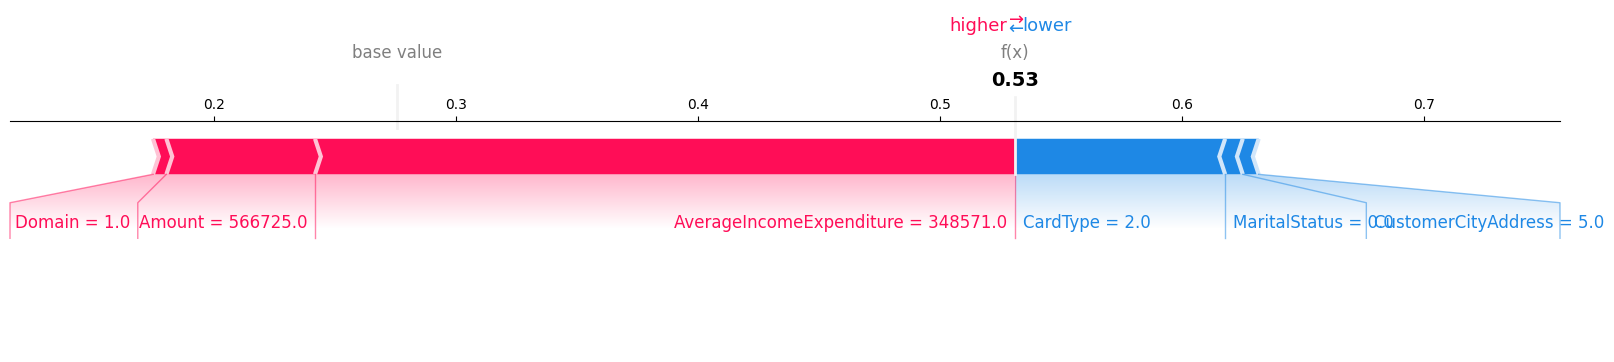

In [ ]:
i = 45
shap.force_plot(explainer.expected_value[0], shap_values[i][:, 1], X_test.iloc[i], matplotlib=True)